In [1]:
import os
import pickle
import datetime
import numpy as np
import pandas as pd

In [2]:
cur_dir = os.getcwd()
main_dir = os.path.dirname(os.path.dirname(cur_dir))
data_dir = os.path.join(main_dir, "ConsolidatedData", "Training1")

all_df_dataname = "videotimed_labeled_consolidated_all.pkl"
pzt_datanames = ["consolidated_pzt_0.pkl", "consolidated_pzt_1.pkl"]
sg_datanames = ["consolidated_repeated_sg_0.pkl", "consolidated_repeated_sg_1.pkl"]

all_df_pkl = os.path.join(data_dir, all_df_dataname)
with open(all_df_pkl, 'rb') as f:
  all_df = pickle.load(f)

pzt_dfs = list()
sg_dfs = list()
for i in range(len(pzt_datanames)):
  pzt_df_pkl = os.path.join(data_dir, pzt_datanames[i])
  with open(pzt_df_pkl, 'rb') as f:
    pzt_df = pickle.load(f)
  pzt_dfs.append(pzt_df)
  
  sg_df_pkl = os.path.join(data_dir, sg_datanames[i])
  with open(sg_df_pkl, 'rb') as f:
    sg_df = pickle.load(f)
  sg_dfs.append(sg_df)

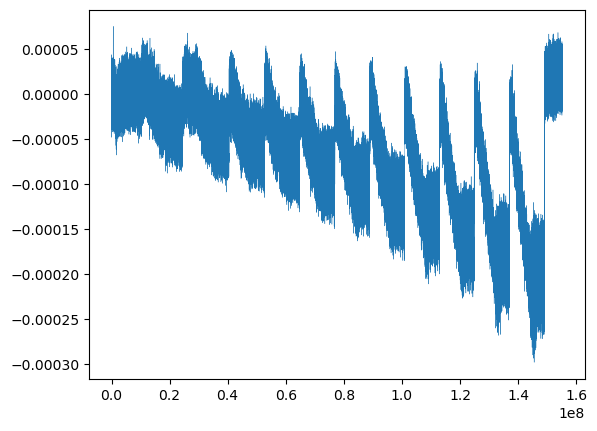

In [11]:
import matplotlib.pyplot as plt
sg_df = sg_dfs[0]
sensor_id = "SG 2 (V)"

start_ix = 0
end_ix = sg_df.shape[0]

_, ax = plt.subplots()
ax.plot(sg_df[sensor_id + " (normalized) (compensated)"][start_ix:end_ix], label=sensor_id + " (compensated)", linewidth=0.3) #for normalized SGs/RTDs

In [3]:
# Block to check blacked-out data. Blacked out data not being used in the analysis.

# Load the blackout times relevant to the training data
# test_dates = ["08_01_2022", "08_02_2022"]
# test_folders = ["Day1_Training1", "Day2_Training1"]
# blackout_filename = "blackout_masks.npy"
# blackout_masks_all = list()

# for i,test_folder in enumerate(test_folders):
#   data_dir = os.path.join(main_dir, test_dates[i]+"_Tests", "testdata", test_folder)
#   blackout_masks_all.append(np.load(os.path.join(data_dir, blackout_filename), allow_pickle=True))
  

In [12]:
print (all_df.shape)
print (pzt_dfs[1].shape)
print (sg_dfs[1].shape)
# print (blackout_masks_all[1].shape)

(2664309, 118)
(55358000, 7)
(55360600, 8)


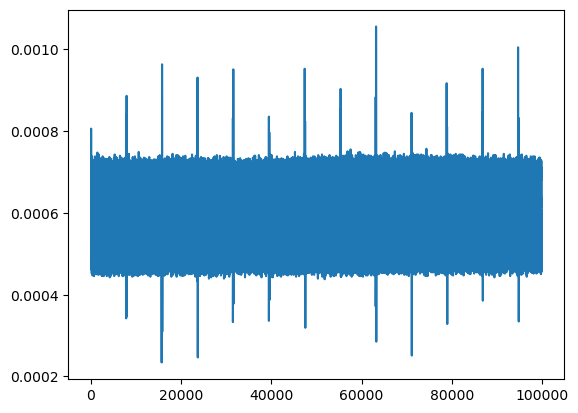

In [3]:
import matplotlib.pyplot as plt
plt.plot(pzt_dfs[0]["PZT 1"][0:100000])

In [4]:
all_df.tail()

,rtdstr_orig_index,Label,Video Time (sec),Date/Time,rtdstr_DateTime Obj,Temp,Datapoint,Sensor ID,SG 1 (V),SG 1 (V) (normalized),...,Temp (F),Yaw (deg)_y,Inclination (deg),Roll (deg)_y,Lift (lbf),Drag (lbf),Side Force (lbf),Mx (ft-lbf),My (ft-lbf),Mz (ft-lbf)
2664304,701249,None,None,2022-08-02_14-10-54-23,2022-08-02 14:10:54.230,NaN,701250.0,NaN,1.653519,0.000152,...,83.5,0.0,0.0,0.0,-0.11,0.0,-0.02,-0.09,-0.13,0.12
2664305,701250,None,None,2022-08-02_14-10-54-24,2022-08-02 14:10:54.240,NaN,701251.0,NaN,1.653527,0.000160,...,83.5,0.0,0.0,0.0,-0.11,0.0,-0.02,-0.09,-0.13,0.12
2664306,701251,None,None,2022-08-02_14-10-54-24,2022-08-02 14:10:54.240,NaN,701252.0,NaN,1.653509,0.000142,...,83.5,0.0,0.0,0.0,-0.11,0.0,-0.02,-0.09,-0.13,0.12
2664307,701252,None,None,2022-08-02_14-10-54-25,2022-08-02 14:10:54.250,NaN,701253.0,NaN,1.653541,0.000174,...,83.5,0.0,0.0,0.0,-0.11,0.0,-0.02,-0.09,-0.13,0.12
2664308,701253,None,None,2022-08-02_14-10-54-26,2022-08-02 14:10:54.260,NaN,701254.0,NaN,1.653495,0.000128,...,83.5,0.0,0.0,0.0,-0.11,0.0,-0.02,-0.09,-0.13,0.12


In [5]:
pzt_dfs[0].head()

,PZT 1,PZT 2,PZT 3,PZT 4,PZT 5,PZT 6,PZT 7
0,0.000462,0.000715,0.000519,0.001321,-0.000116,0.000550,0.000532
1,0.000478,0.000726,0.000533,0.001335,-0.000100,0.000569,0.000561
2,0.000473,0.000723,0.000532,0.001322,-0.000108,0.000566,0.000558
3,0.000473,0.000723,0.000533,0.001336,-0.000100,0.000566,0.000555
4,0.000473,0.000717,0.000530,0.001345,-0.000102,0.000570,0.000564


In [7]:
sg_dfs[0].head()

,SG 1 (V) (normalized) (compensated),SG 2 (V) (normalized) (compensated),SG 4 (V) (normalized) (compensated),SG 5 (V) (normalized) (compensated),SG 6 (V) (normalized) (compensated),SG TE (V) (normalized),SG LE (V) (normalized),repeated_DateTime Obj
0,0.000011,8.124879e-07,0.00001,0.000003,5.294521e-07,-0.000009,0.000007,2022-08-01 17:24:52.960000
1,0.000011,7.778799e-07,0.00001,0.000003,5.322707e-07,-0.000009,0.000007,2022-08-01 17:24:52.960100
2,0.000011,7.432719e-07,0.00001,0.000003,5.350892e-07,-0.000009,0.000007,2022-08-01 17:24:52.960200
3,0.000011,7.086639e-07,0.00001,0.000003,5.379078e-07,-0.000009,0.000007,2022-08-01 17:24:52.960300
4,0.000011,6.740559e-07,0.00001,0.000004,5.407263e-07,-0.000009,0.000007,2022-08-01 17:24:52.960400


In [3]:
def process_test_timing(all_airspeeds, all_aoas, all_df):
  print ("Starting to record the timings and datapoints of tests.")
  df_start_times = list()
  shortest_test_time = datetime.timedelta(days=1)

  for airspeed in all_airspeeds:
    for aoa in all_aoas:
      state_label = f"{airspeed}m/s_{aoa}deg"
      start_t = all_df.loc[all_df["Label"] == state_label]["rtdstr_DateTime Obj"].iloc[0]
      end_t = all_df.loc[all_df["Label"] == state_label]["rtdstr_DateTime Obj"].iloc[-1]
      
      if end_t - start_t < shortest_test_time:
        shortest_test_time = end_t - start_t
      df_start_times.append(start_t)

  test_lines = int (shortest_test_time.total_seconds() * 10000)
  print ("Recorded: \n (i): start time of each training experiment \n (ii): Number of lines in each test.")
  print ()
  return shortest_test_time, df_start_times

In [4]:
all_airspeeds = [7, 8.3, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
all_aoas = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
(shortest_test_time, df_start_times) = process_test_timing(all_airspeeds, all_aoas, all_df)

Starting to record the timings and datapoints of tests.
Recorded: 
 (i): start time of each training experiment 
 (ii): Number of lines in each test.



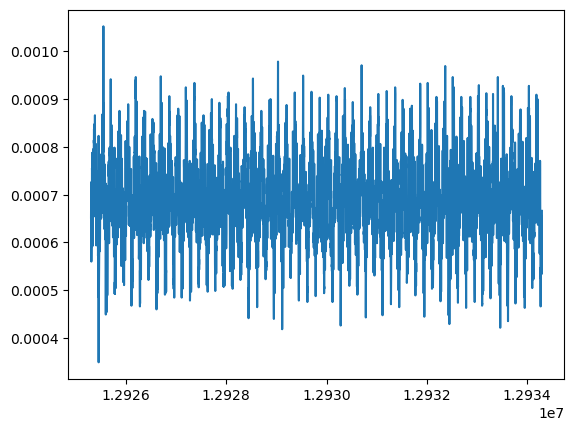

In [25]:
import matplotlib.pyplot as plt
plt.plot(pzt_df["PZT 1"][12925300:12934300])

In [5]:
def arrange_data(available_airspeeds, available_aoas, available_sensors, pzt_df, sg_df, shortest_test_time, df_start_times, blackout_mask=None):
  # Get the total data parameters
  #Comment2
  print ("Starting to record the start and end indices of each test.")
  sg_df_ix = 0
  dense_data_start_ixs = list()
  start_rows = sg_df[sg_df["repeated_DateTime Obj"].isin(df_start_times)]
  dense_data_start_ixs = start_rows.index.to_list()
  print ("Recorded start and end indices of each test.")
  print ()

  #Comment3
  test_lines = int (shortest_test_time.total_seconds() * 10000)
  state_count = len(available_airspeeds) * len(available_aoas)
  sensor_count = len(available_sensors)
  if blackout_mask is not None: sensor_count += 1
  examples = np.zeros((state_count, sensor_count, test_lines))
  states = np.empty(state_count, dtype="S20")
  
  #Comment4
  pzt_channels = [sensor_id for sensor_id in available_sensors if "PZT" in sensor_id]
  sg_channels = [sensor_id + " (V) (normalized) (compensated)" for sensor_id in available_sensors if "SG" in sensor_id]
  
  #Comment5
  state_id = 0
  for airspeed in available_airspeeds:
    for aoa in available_aoas:
      print (f"Processing: {airspeed}m/s_{aoa}deg")

      df_start_ix = dense_data_start_ixs[state_id]
      df_end_ix = df_start_ix + test_lines
      examples[state_id, 0:len(pzt_channels), 0:test_lines] = pzt_df.iloc[df_start_ix:df_end_ix].T
      examples[state_id, len(pzt_channels):len(pzt_channels)*2, 0:test_lines] = sg_df.loc[df_start_ix:df_end_ix-1,
                                                                       sg_df.columns != "repeated_DateTime Obj"].T
      if blackout_mask is not None:
        examples[state_id, -1, 0:test_lines] = blackout_mask[df_start_ix:df_end_ix]

      states[state_id] = f"{airspeed}m/s_{aoa}deg"

      state_id += 1

  print ("Finished processing all data.")
  return (examples, states)

examples_list = list()
states_list = list()

available_airspeeds = [7, 8.3, 9, 10, 11, 12, 13, 14, 15, 16, 17]
available_aoas = all_aoas
available_sensors = ['PZT 1', 'PZT 2', 'PZT 3', 'PZT 4', 'PZT 5', 'PZT 6', 'PZT 7', 
                    'SG 1', 'SG 2', 'SG 4', 'SG 5', 'SG 6', 'SG LE', 'SG TE']
#Below make sure the index in pzt_dfs[index] and sg_dfs[index] match with available airspeeds, aoas, and sensors
(examples, states) = arrange_data (available_airspeeds, available_aoas, available_sensors, pzt_dfs[0], sg_dfs[0], shortest_test_time, df_start_times)
examples_list.append(examples)
states_list.append(states)

available_airspeeds = [18, 19, 20]
#Below make sure the index in pzt_dfs[index] and sg_dfs[index] match with available airspeeds, aoas, and sensors
(examples, states) = arrange_data (available_airspeeds, available_aoas, available_sensors, pzt_dfs[1], sg_dfs[1], shortest_test_time, df_start_times)
examples_list.append(examples)
states_list.append(states)

Starting to record the start and end indices of each test.
Recorded start and end indices of each test.

Processing: 7m/s_0deg
Processing: 7m/s_1deg
Processing: 7m/s_2deg
Processing: 7m/s_3deg
Processing: 7m/s_4deg
Processing: 7m/s_5deg
Processing: 7m/s_6deg
Processing: 7m/s_7deg
Processing: 7m/s_8deg
Processing: 7m/s_9deg
Processing: 7m/s_10deg
Processing: 7m/s_11deg
Processing: 7m/s_12deg
Processing: 7m/s_13deg
Processing: 7m/s_14deg
Processing: 7m/s_15deg
Processing: 7m/s_16deg
Processing: 8.3m/s_0deg
Processing: 8.3m/s_1deg
Processing: 8.3m/s_2deg
Processing: 8.3m/s_3deg
Processing: 8.3m/s_4deg
Processing: 8.3m/s_5deg
Processing: 8.3m/s_6deg
Processing: 8.3m/s_7deg
Processing: 8.3m/s_8deg
Processing: 8.3m/s_9deg
Processing: 8.3m/s_10deg
Processing: 8.3m/s_11deg
Processing: 8.3m/s_12deg
Processing: 8.3m/s_13deg
Processing: 8.3m/s_14deg
Processing: 8.3m/s_15deg
Processing: 8.3m/s_16deg
Processing: 9m/s_0deg
Processing: 9m/s_1deg
Processing: 9m/s_2deg
Processing: 9m/s_3deg
Processing:

In [6]:
allExamples = np.concatenate([example for example in examples_list], axis=0)
# allState = np.concatenate((state for state in states_list), axis=0)

In [7]:
output_folder = os.path.join(main_dir, "KerasTraining", "Training1", "data")
np.save(os.path.join(output_folder, "sttr_aug2022_data_multidf"), allExamples)
# np.save(os.path.join(output_folder, "sttr_aug2022_statelabels"), allState)

In [8]:
examples_list[0].shape

(187, 14, 599200)